#**Stock Price Prediction- Apple**


**Executed By Sudhanshu Kumar |sudhanshukumar15678@gmail.com**

In [1]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#import the training dataset
dataset_train = pd.read_csv('Apple_Stock_Price_Train.csv')
dataset_test= pd.read_csv("Apple_Stock_Price_Test.csv")

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-08-03,5.900357,5.951428,5.888214,5.943929,5.136382,394240000
1,2009-08-04,5.890357,5.913214,5.864643,5.912500,5.109222,395810800
2,2009-08-05,5.919643,5.978214,5.864643,5.896786,5.095644,423183600
3,2009-08-06,5.913571,5.946786,5.824643,5.853929,5.058609,341616800
4,2009-08-07,5.910357,5.950000,5.885714,5.911071,5.107988,387354800


In [4]:
#create an array of values that contain only the opening stock market price for each day
training_set = dataset_train.iloc[:, 1:2].values 

In [5]:
training_set

array([[  5.900357],
       [  5.890357],
       [  5.919643],
       ...,
       [126.18    ],
       [127.142502],
       [126.012497]])

#**Visuliazing Some Data from the dataset**

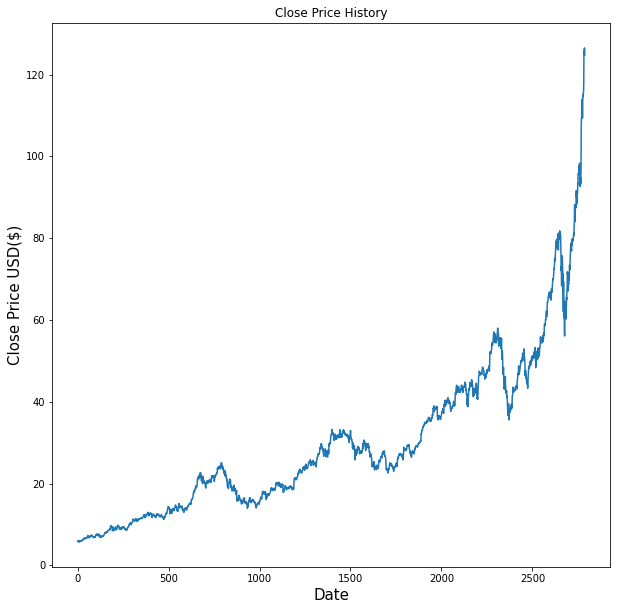

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Close Price History')
plt.plot(dataset_train['Close'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price USD($)',fontsize=15)
plt.show()

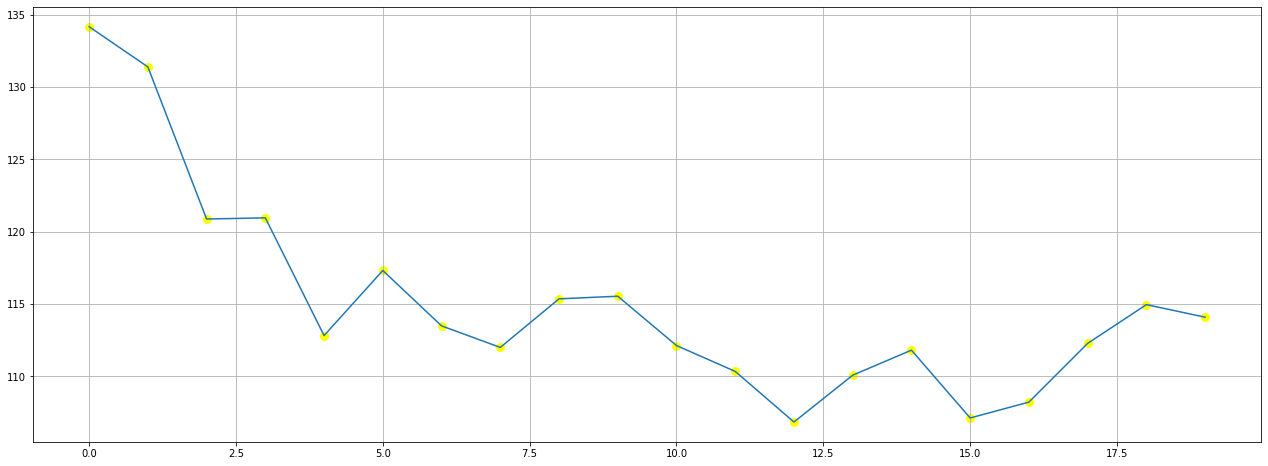

In [7]:
plt.figure(figsize=(22,8))
plt.scatter(dataset_test.index,dataset_test["Close"],color="Yellow",lw=3)
plt.plot(dataset_test.index,dataset_test["Close"])
plt.grid(True)
plt.show()

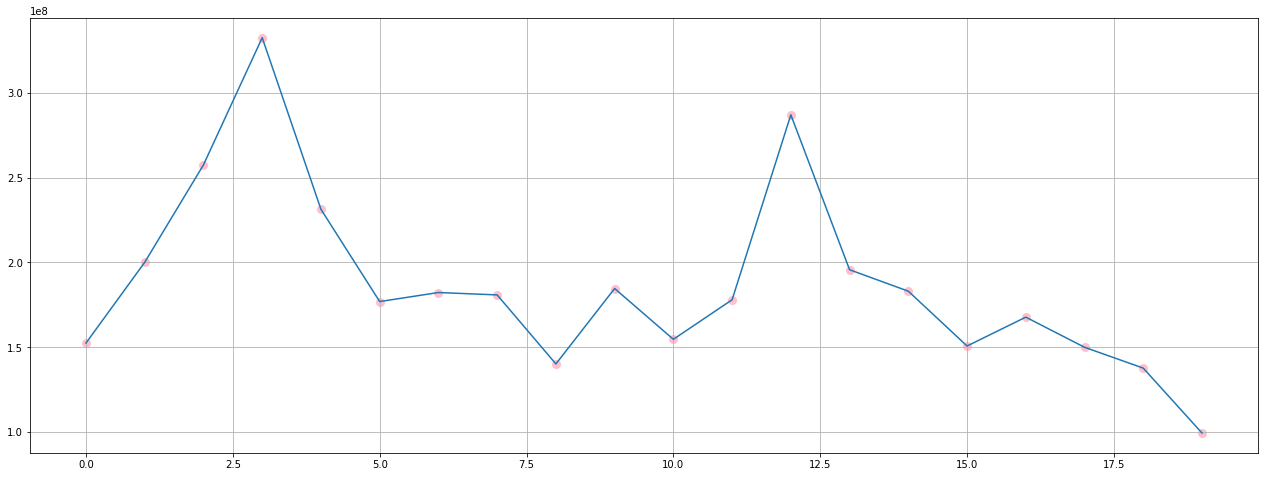

In [8]:
plt.figure(figsize=(22,8))
plt.scatter(dataset_test.index,dataset_test["Volume"],color="pink",lw=3)
plt.plot(dataset_test.index,dataset_test["Volume"])
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

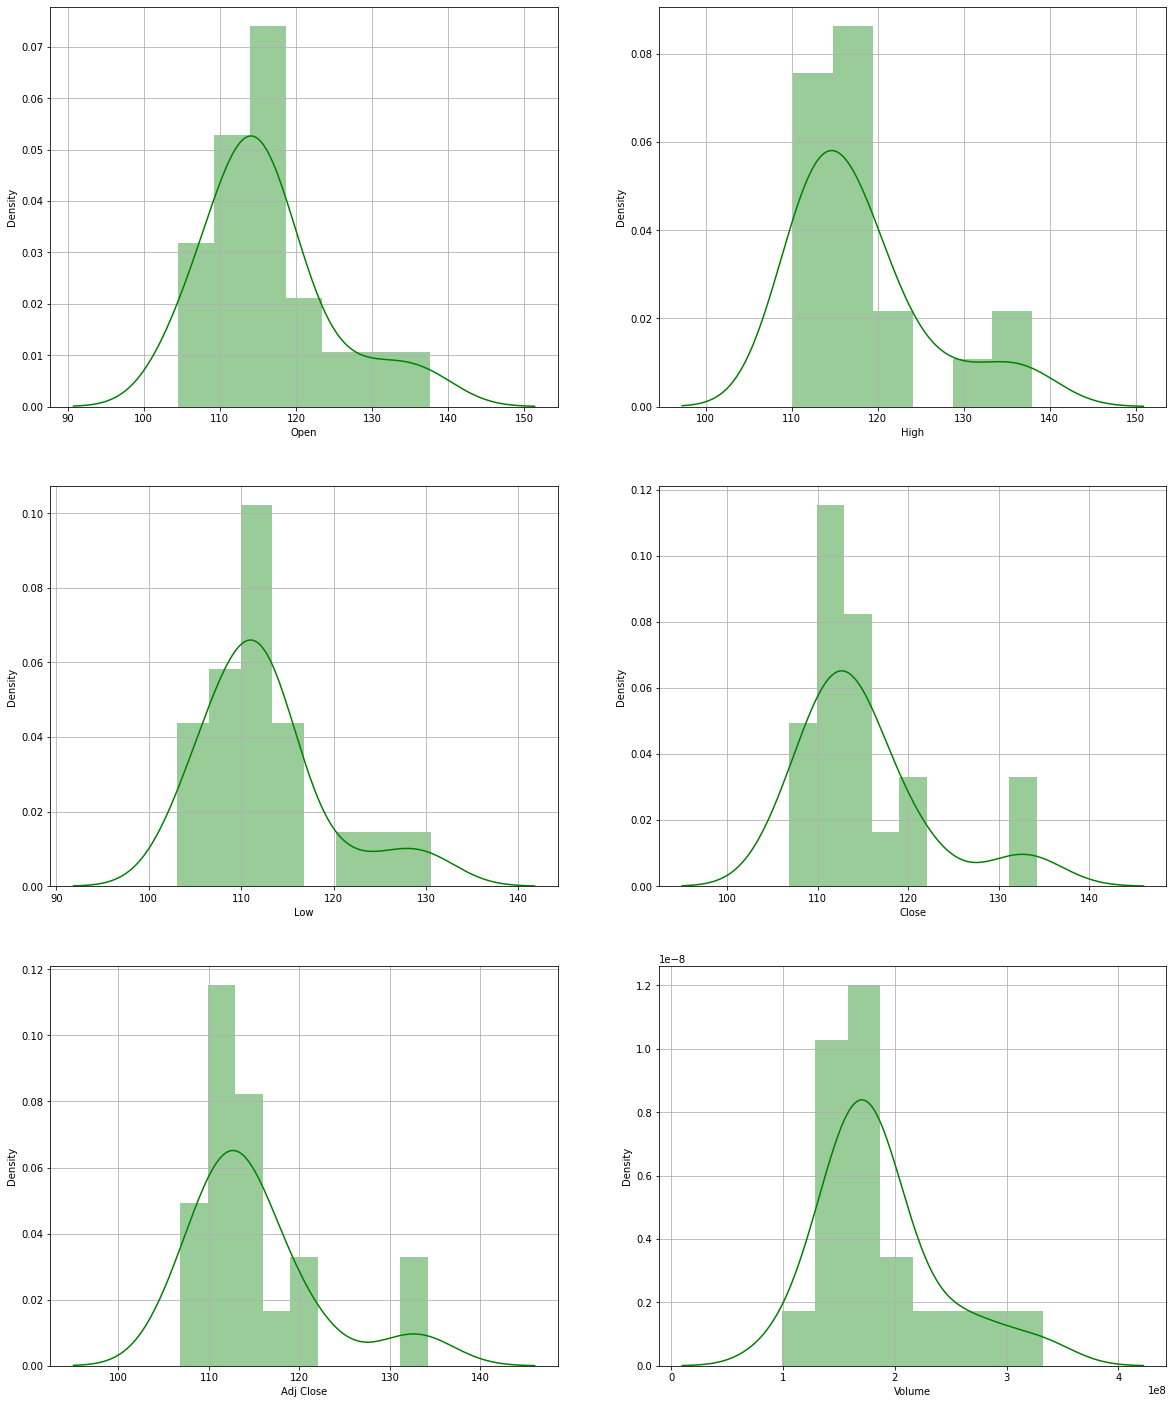

In [9]:
fig, ax1 = plt.subplots(3,2, figsize=(20,25))
k = 1
columns = list(dataset_test.columns)
for i in range(3):
    for j in range(2):
            sns.distplot(dataset_test[columns[k]], ax = ax1[i][j], color = 'green')
            ax1[i][j].grid(True)
            k += 1
plt.show()

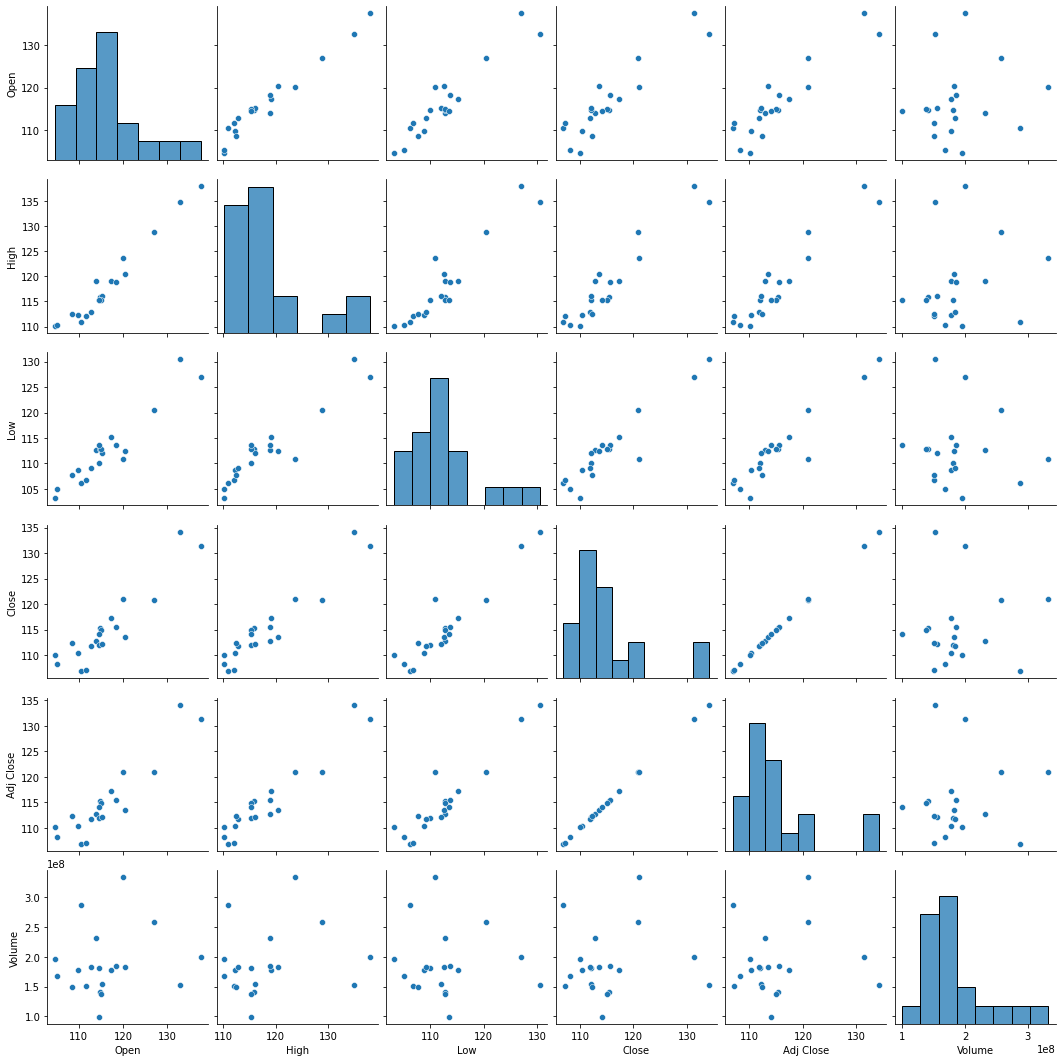

In [10]:
sns.pairplot(dataset_test)

The training and test data sets must be rescaled to the range from 0 to 1

Using the ScikitLearn library MinMaxScaler() transforms the selected feature by scaling it to a given range

In [11]:
#import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
#creates a scaler instance to rescale all data to the range of 0 to 1
sc = MinMaxScaler(feature_range = (0, 1))

In [13]:
#creates the actual training set of scaled values
training_set_scaled = sc.fit_transform(training_set)

In [14]:
training_set_scaled

array([[1.04012207e-03],
       [9.58771648e-04],
       [1.19701449e-03],
       ...,
       [9.79520072e-01],
       [9.87350067e-01],
       [9.78157428e-01]])

In [15]:
#creating a data structure with 90 timesteps and 1 output
X_train = [] 

In [16]:
training_set_scaled.shape

(2789, 1)

In [17]:
#the stock price today
y_train = [] 

In [18]:
# go back 90 days
for i in range(90, 2789): 
    # 0 is the column ID, the only column in this case.    
    # put the last 90 days values in one row of X_train
    X_train.append(training_set_scaled[i-90:i, 0]) 
    y_train.append(training_set_scaled[i, 0])

In [19]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train

array([[1.04012207e-03, 9.58771648e-04, 1.19701449e-03, ...,
        1.10607529e-02, 9.20712667e-03, 8.05659581e-03],
       [9.58771648e-04, 1.19701449e-03, 1.14761851e-03, ...,
        9.20712667e-03, 8.05659581e-03, 8.61443191e-03],
       [1.19701449e-03, 1.14761851e-03, 1.12147249e-03, ...,
        8.05659581e-03, 8.61443191e-03, 1.10026443e-02],
       ...,
       [5.18324227e-01, 5.14927822e-01, 5.09497649e-01, ...,
        9.23245895e-01, 1.00000000e+00, 9.67459889e-01],
       [5.14927822e-01, 5.09497649e-01, 5.14093973e-01, ...,
        1.00000000e+00, 9.67459889e-01, 9.79520072e-01],
       [5.09497649e-01, 5.14093973e-01, 5.16798907e-01, ...,
        9.67459889e-01, 9.79520072e-01, 9.87350067e-01]])

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Keras must be installed in the terminal with

pip3 install keras

In [22]:
#importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
#initialising the RNN as a sequence of layers
regressor = Sequential()

In [24]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape =  (X_train.shape[1], 1)))

In [25]:
# the argument is the dropout rate to ignore in the layers (20%), 
# i.e. 50 units * 20% = 10 units will be dropped each time
regressor.add(Dropout(0.2))

In [26]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [27]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [28]:
# Adding a fourth LSTM layer and some Dropout regularisation
# we removed the return_sequences because we no longer return a 
# sequence but a value instead
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [29]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [30]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [31]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
85/85 [==============================] - 23s 184ms/step - loss: 0.0046
Epoch 2/100
85/85 [==============================] - 15s 180ms/step - loss: 0.0013
Epoch 3/100
85/85 [==============================] - 15s 180ms/step - loss: 0.0010
Epoch 4/100
85/85 [==============================] - 16s 183ms/step - loss: 0.0011
Epoch 5/100
85/85 [==============================] - 15s 181ms/step - loss: 8.2470e-04
Epoch 6/100
85/85 [==============================] - 15s 179ms/step - loss: 9.5074e-04
Epoch 7/100
85/85 [==============================] - 15s 181ms/step - loss: 8.3670e-04
Epoch 8/100
85/85 [==============================] - 15s 182ms/step - loss: 7.5198e-04
Epoch 9/100
85/85 [==============================] - 15s 182ms/step - loss: 8.2079e-04
Epoch 10/100
85/85 [==============================] - 15s 178ms/step - loss: 7.1665e-04
Epoch 11/100
85/85 [==============================] - 15s 181ms/step - loss: 6.6772e-04
Epoch 12/100
85/85 [==============================] - 15s

In [32]:
# Getting the real stock price for September 1st 2020 - September 30th 2020

dataset_test = pd.read_csv('Apple_Stock_Price_Test.csv')
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-01,132.759995,134.800003,130.529999,134.179993,134.179993,152470100
1,2020-09-02,137.589996,137.979996,127.000000,131.399994,131.399994,200119000
2,2020-09-03,126.910004,128.839996,120.500000,120.879997,120.879997,257599600
3,2020-09-04,120.070000,123.699997,110.889999,120.959999,120.959999,332607200
4,2020-09-08,113.949997,118.989998,112.680000,112.820000,112.820000,231366600
5,2020-09-09,117.260002,119.139999,115.260002,117.320000,117.320000,176940500
6,2020-09-10,120.360001,120.500000,112.500000,113.489998,113.489998,182274400
7,2020-09-11,114.570000,115.230003,110.000000,112.000000,112.000000,180860300
8,2020-09-14,114.720001,115.930000,112.800003,115.360001,115.360001,140150100
9,2020-09-15,118.330002,118.830002,113.610001,115.540001,115.540001,184642000


In [33]:
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.size

20

In [34]:
real_stock_price

array([[132.759995],
       [137.589996],
       [126.910004],
       [120.07    ],
       [113.949997],
       [117.260002],
       [120.360001],
       [114.57    ],
       [114.720001],
       [118.330002],
       [115.230003],
       [109.720001],
       [110.400002],
       [104.540001],
       [112.68    ],
       [111.620003],
       [105.169998],
       [108.43    ],
       [115.010002],
       [114.550003]])

In [35]:
#getting a predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 

In [36]:
dataset_total.size

2809

In [37]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values

In [38]:
inputs.size

110

In [39]:
inputs = inputs.reshape(-1,1) 

#apply the feature scaler
inputs = sc.transform(inputs)

In [40]:
#getting a predicted stock price
X_test = []

In [41]:
for i in range(90, 110): 
    X_test.append(inputs[i-90:i, 0])

In [42]:
#not a 3D structure yet
X_test = np.array(X_test)

In [43]:
#add a third dimension with a value of 1 to make a 3D structure for compatibility
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [44]:
predicted_stock_price = regressor.predict(X_test)

In [45]:
#need to inverse the scaling to get meaningful predicted stock price outputs
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
predicted_stock_price.size

20

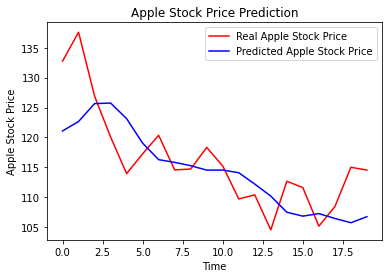

In [46]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()

plt.show()